In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "project_energy_stat"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

First Overview

In [9]:
import pandas as pd

df = pd.read_csv('all_energy_statistics.csv')

In [10]:
df.tail(5)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity
1189481,Viet Nam,Electricity - total wind production,2008,"Kilowatt-hours, million",1.0,NaN,wind_electricity


In [5]:
cat=['country_or_area','commodity_transaction','category','year']

In [11]:
#Number of uniques values per each feature
cols=df.columns
for col in cols:
    print(col,df[col].nunique())


country_or_area 243
commodity_transaction 2452
year 25
unit 6
quantity 137659
quantity_footnotes 1
category 71


In [12]:
year_=df['year']
max(year_), min(year_)

(2014, 1990)

Saving figure Units


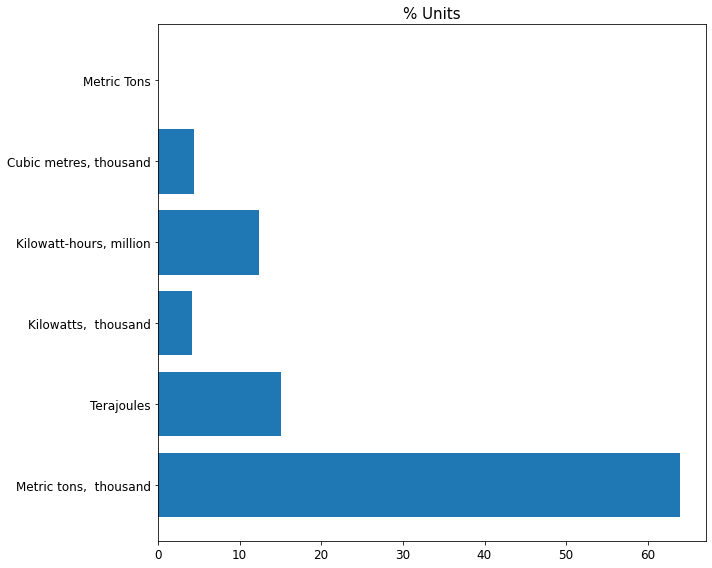

In [13]:
hist_units=[]
name_units=[]
for i in df['unit'].unique():
    a=df[df['unit']==i]
    name_units.append(i)
    hist_units.append(len(a))

plt.figure(figsize=[10,8])
y=list(map(lambda i: round(i/sum(hist_units)*100,2),hist_units))
plt.barh(name_units,y)
plt.title('% Units',fontsize=15)
save_fig('Units')

<ipython-input-17-433da0a3cbb7>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=a[df['category']==k]


Saving figure Metric tons, thousand


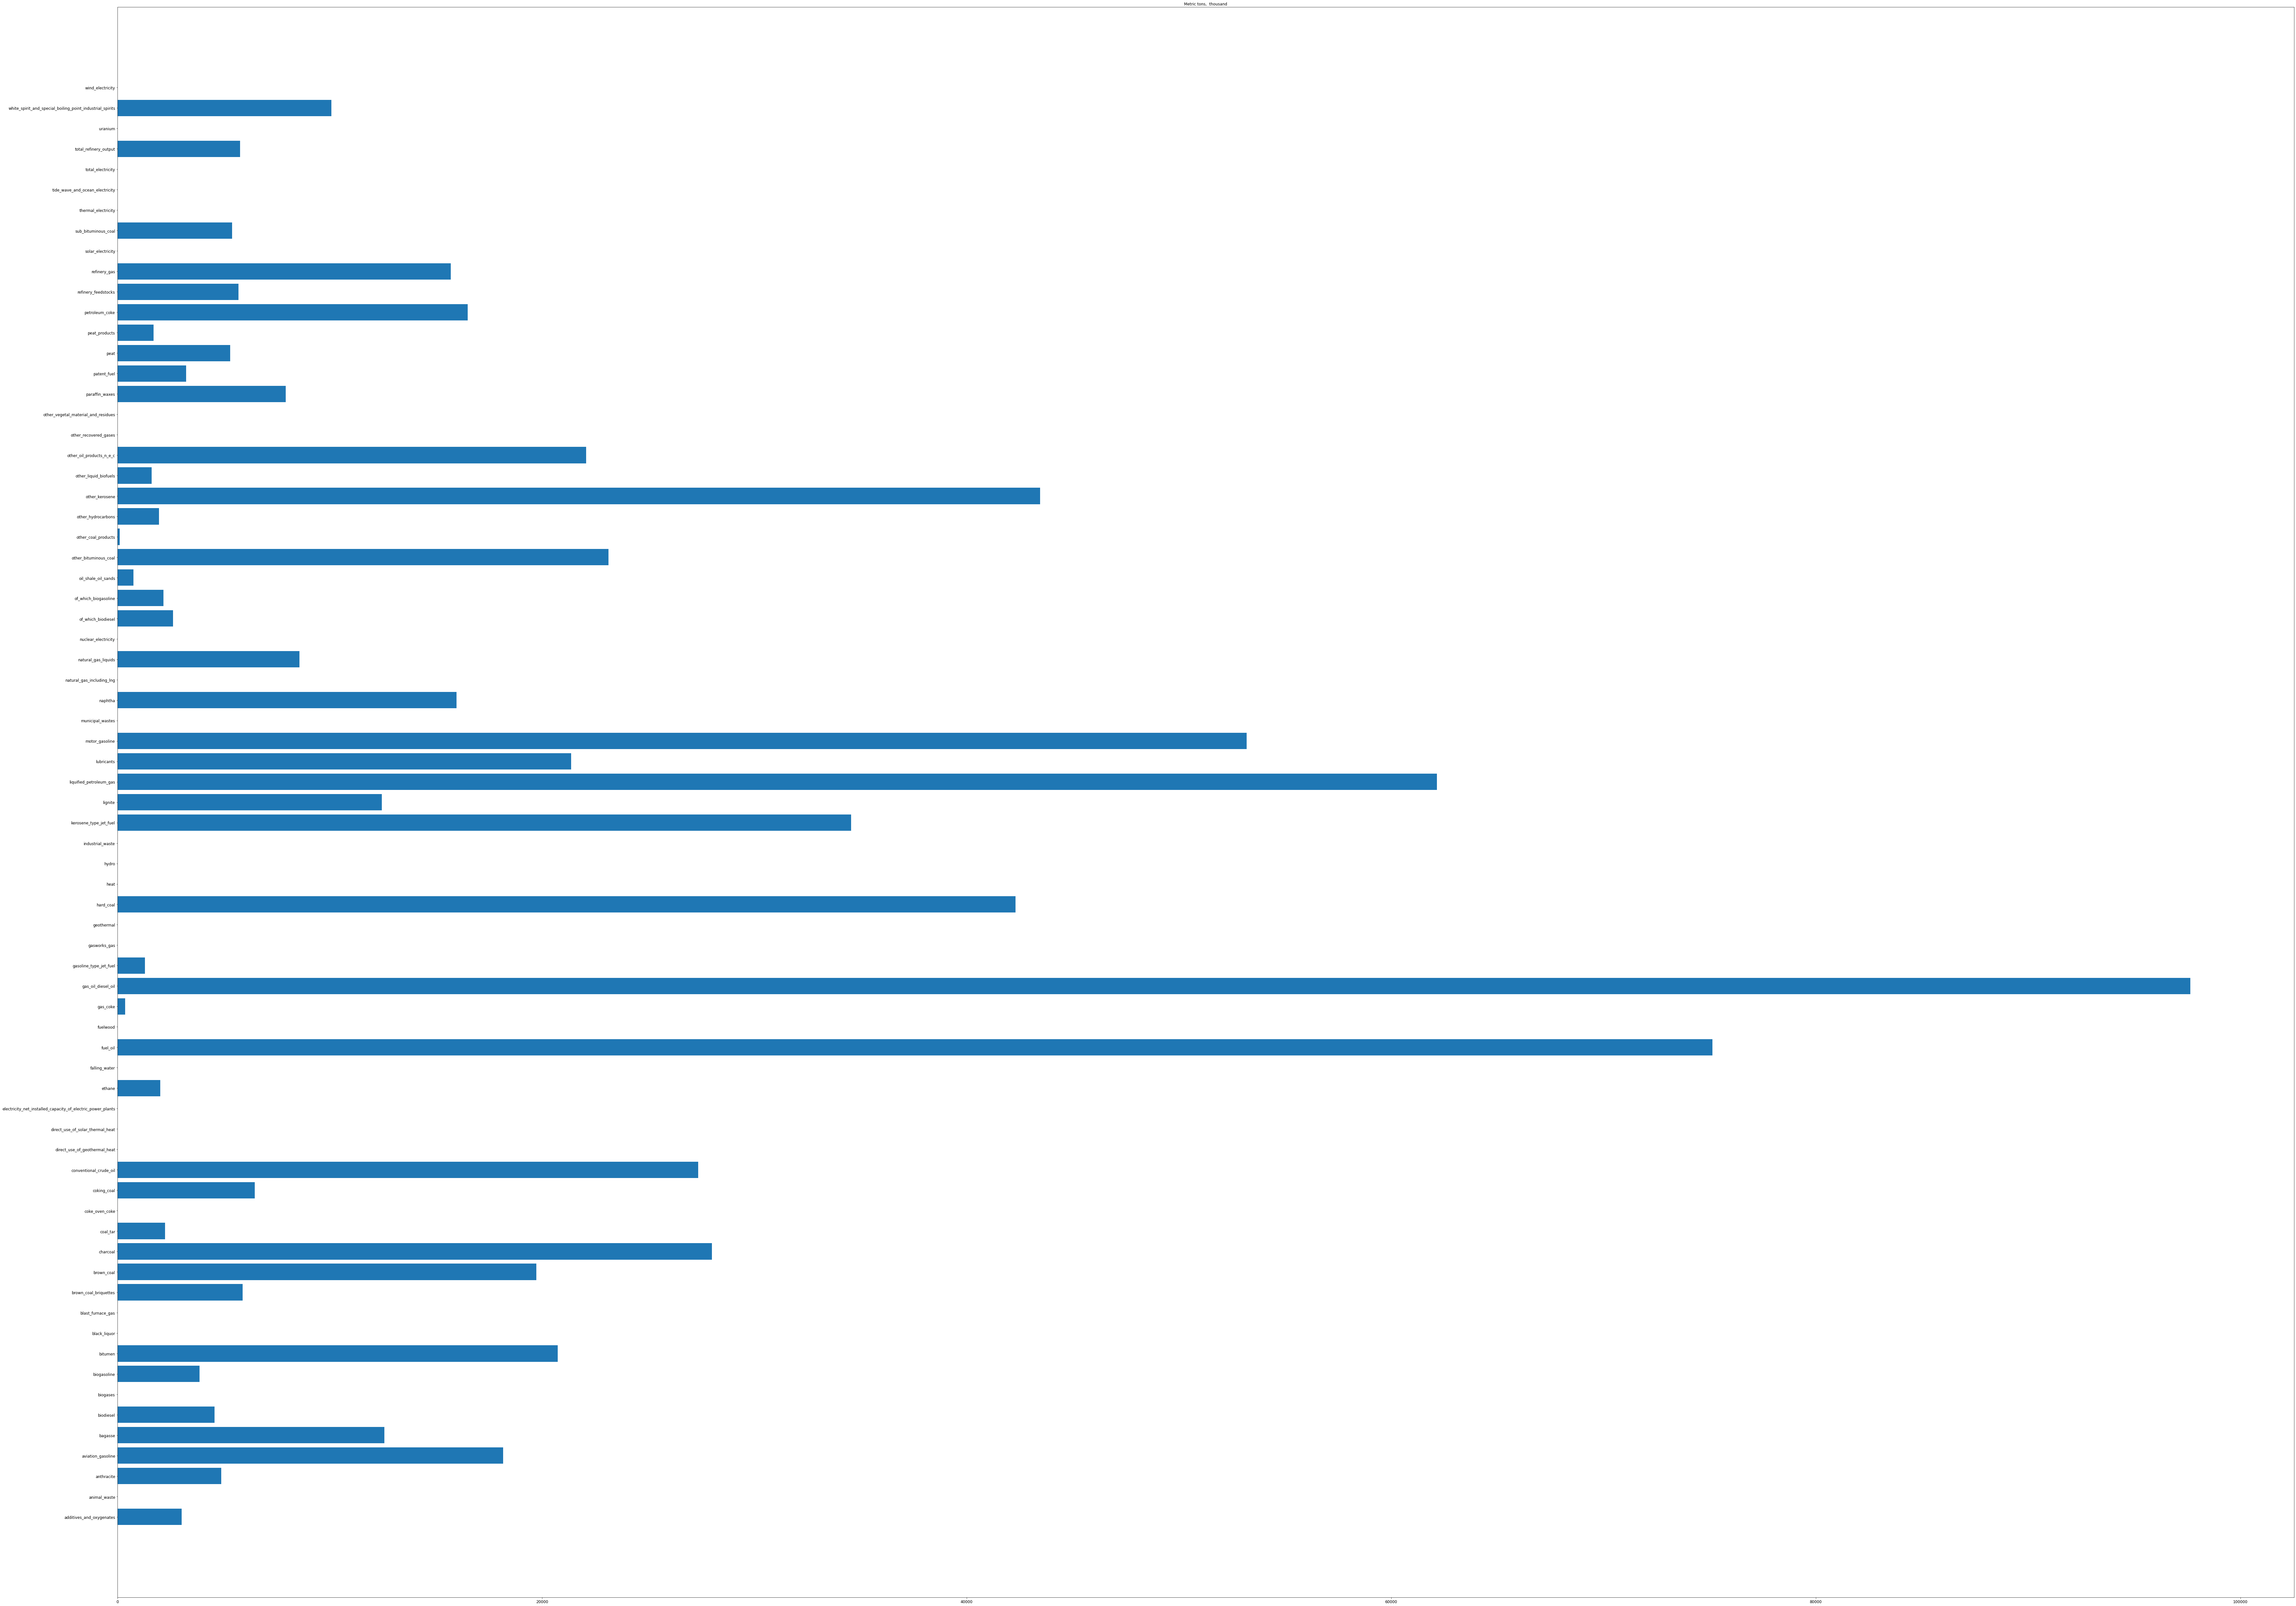

In [17]:
#Visualize Categories in each unit
units = df['unit'].unique()
category = df['category'].unique()
a=df[df['unit']==units[0]]
s=[]
t=[]
for k in category:
    b=a[df['category']==k]
    s.append(len(b))
plt.figure(figsize=(100,70))
plt.barh(category,s)
plt.title(units[0])
save_fig('Metric tons, thousand')

In [19]:
units[0], units[1]

('Metric tons,  thousand', 'Terajoules')

<ipython-input-18-c38cad4aef18>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=a[df['category']==k]


Text(0.5, 1.0, 'Terajoules')

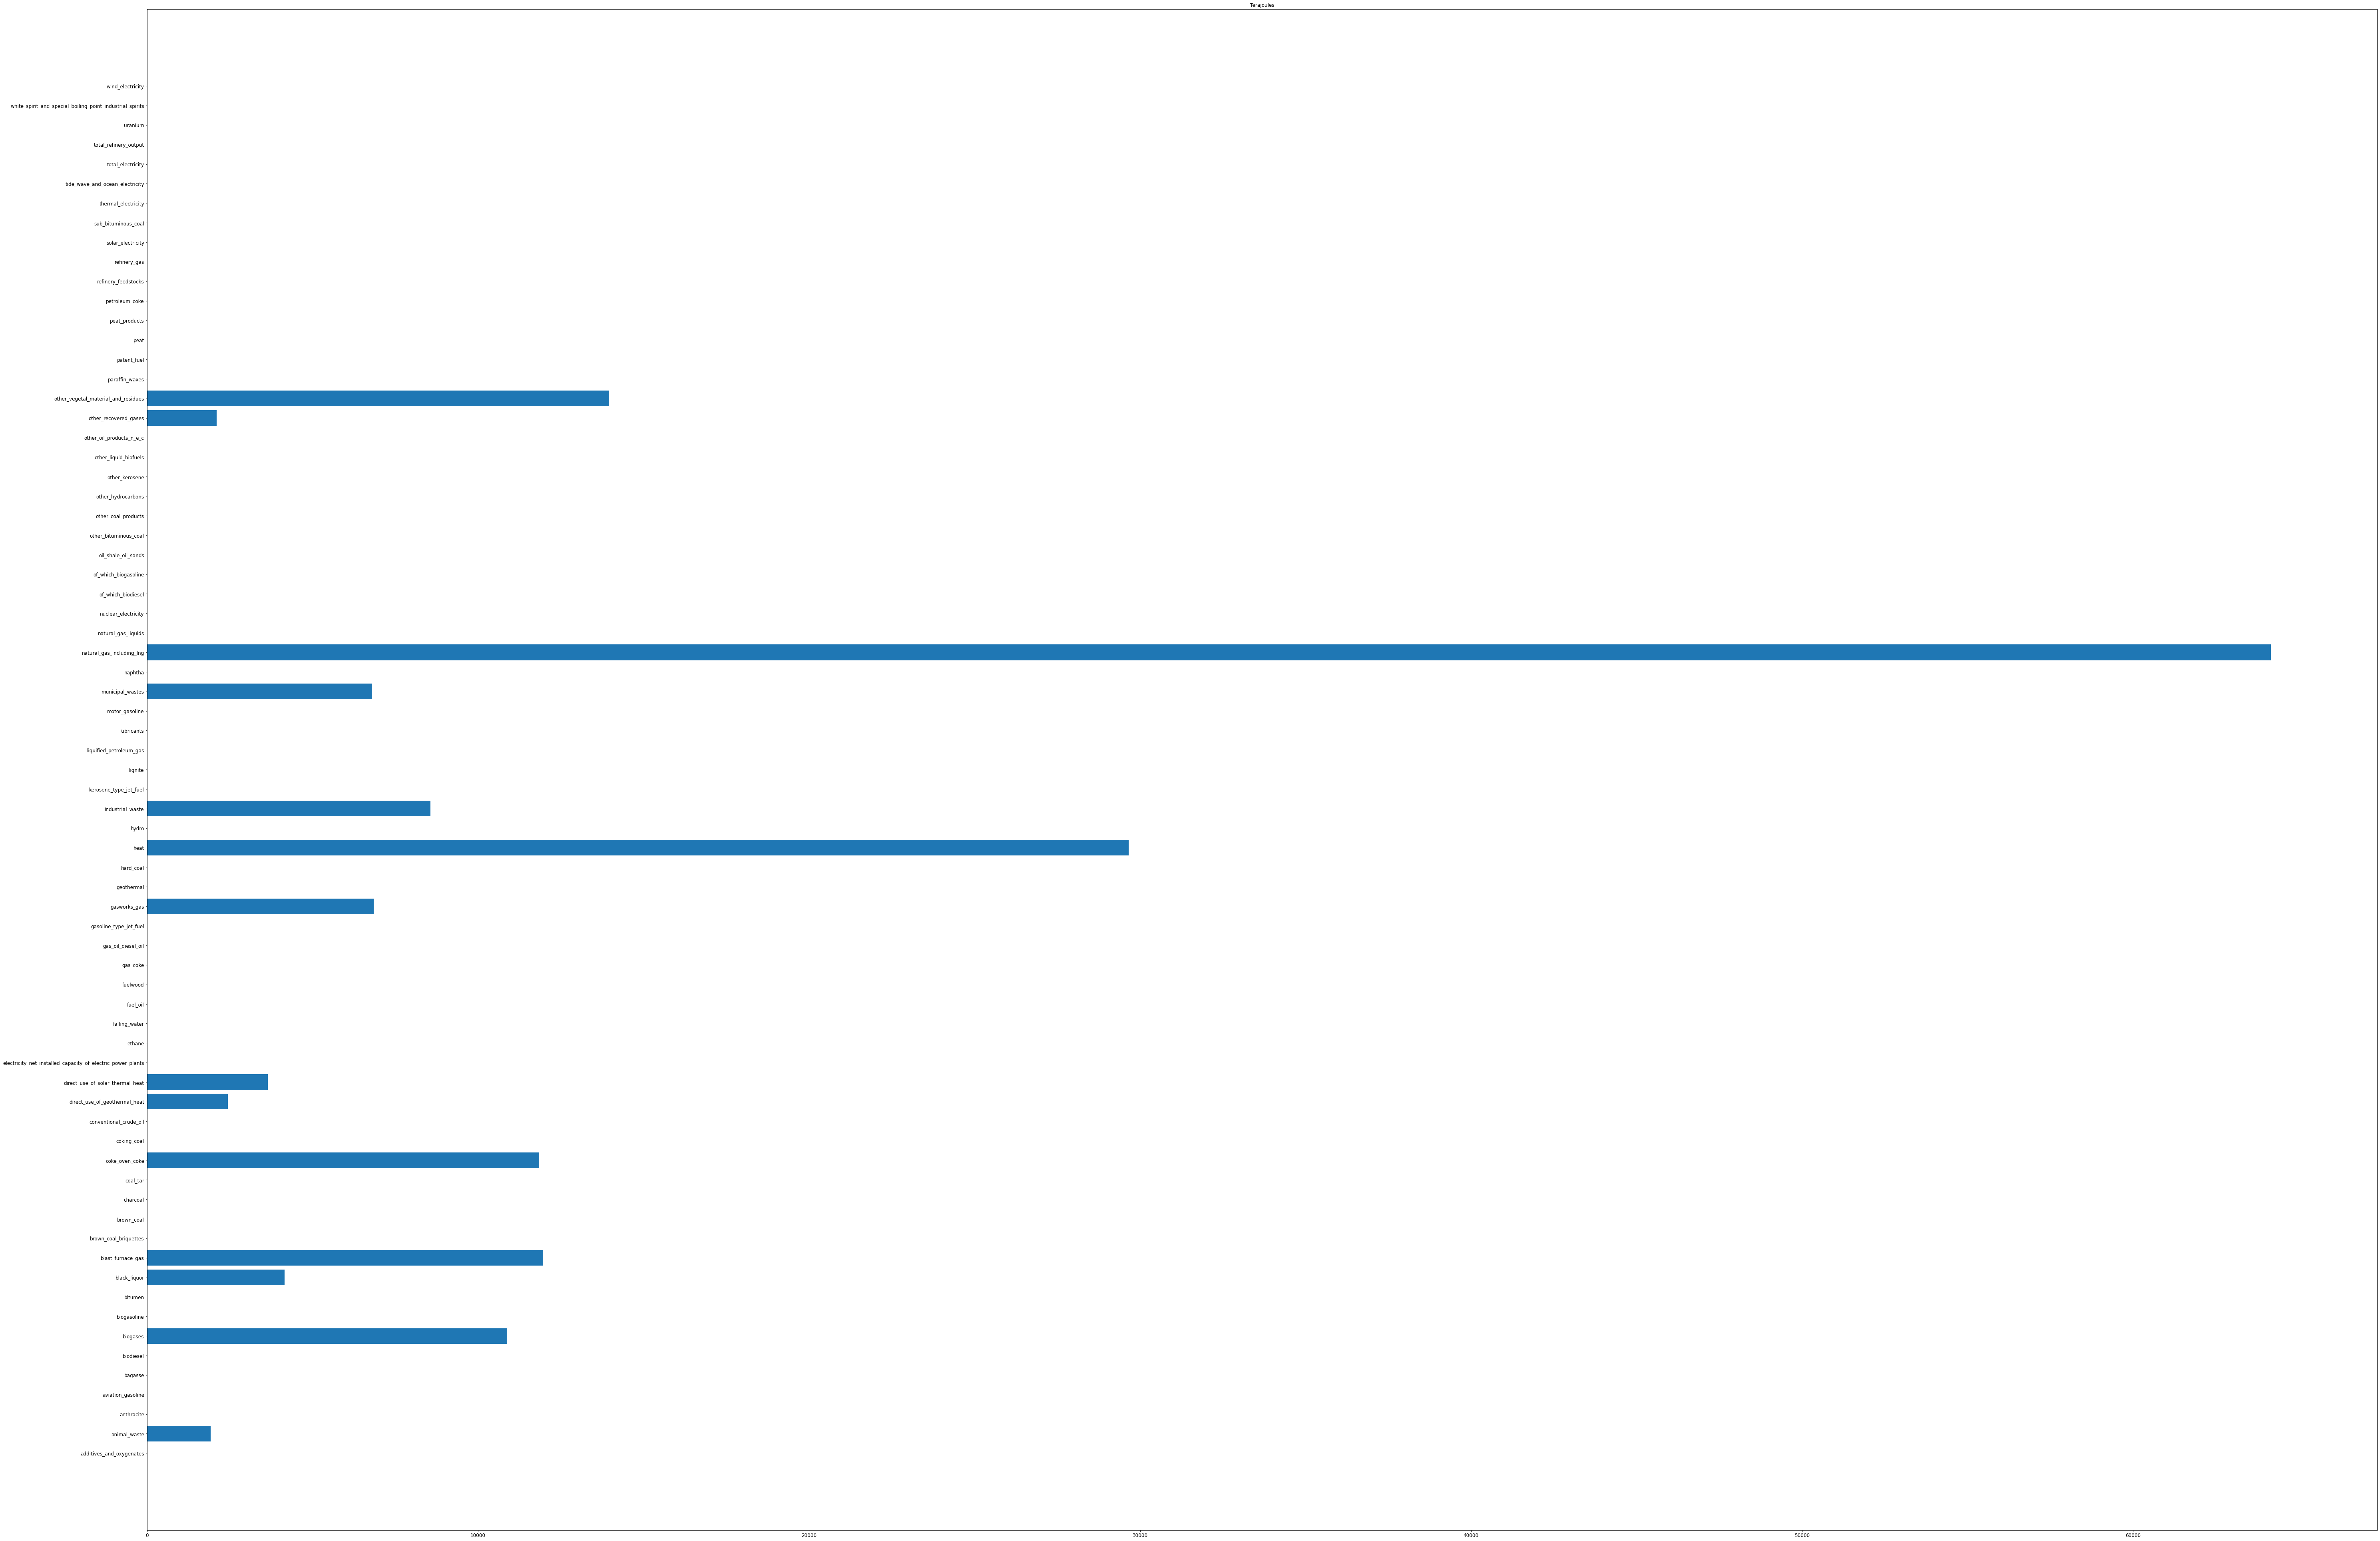

In [18]:
a=df[df['unit']==units[1]]
s=[]
t=[]
for k in category:
    b=a[df['category']==k]
    t.append(b)
    s.append(len(b))
plt.figure(figsize=(100,70))
plt.barh(category,s)
plt.title(units[1])

In [24]:
#Visualize 20 categories with the most quantity consumed
data_cat=df.groupby('category')['quantity'].sum().sort_values(ascending=False)[0:20]


<BarContainer object of 20 artists>

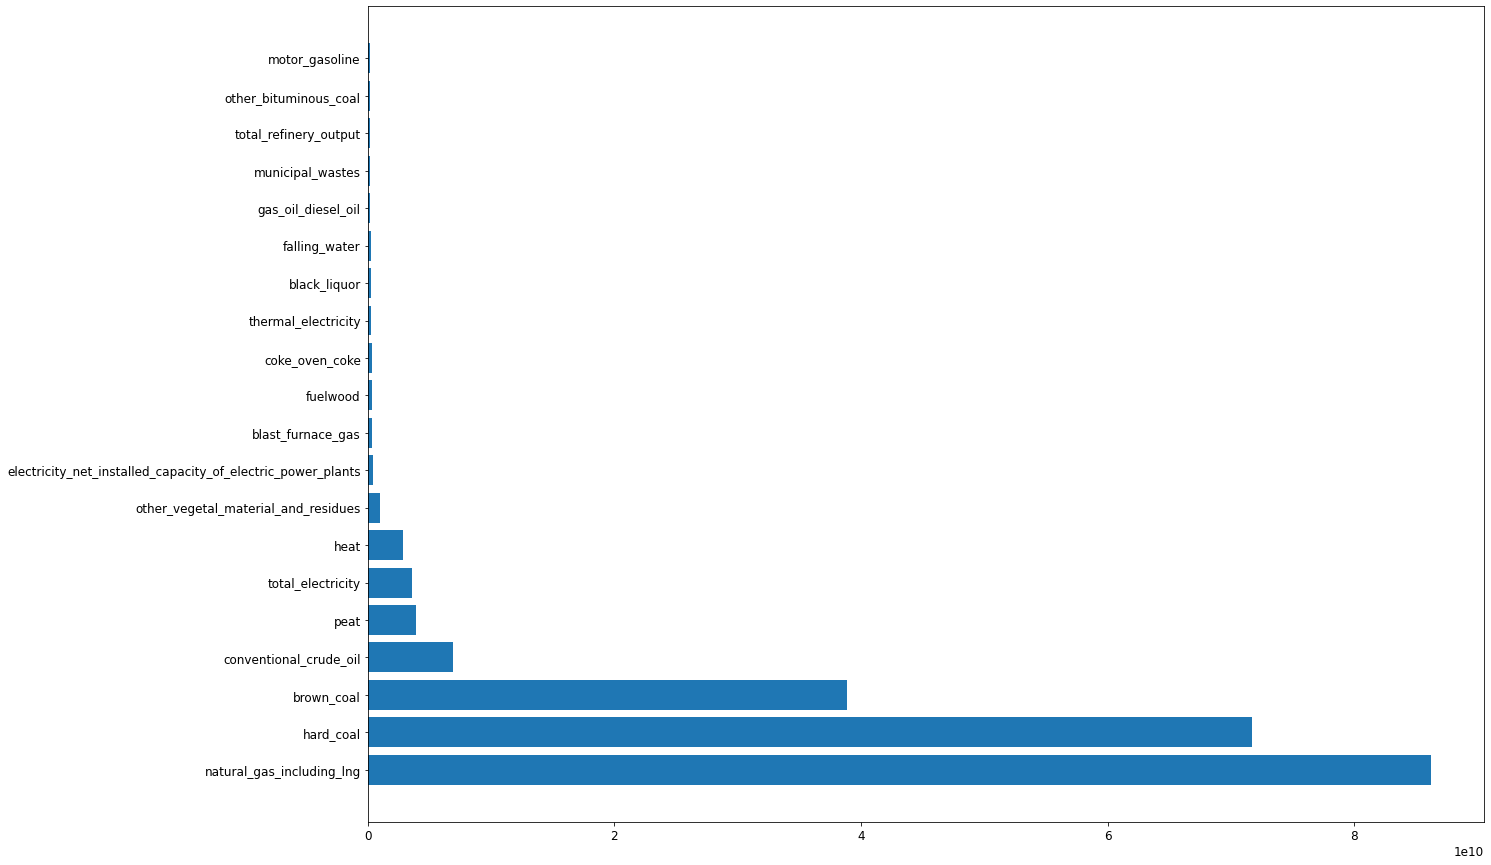

In [26]:
plt.figure(figsize=(20,15))
plt.barh(data_cat.index,data_cat)

<BarContainer object of 20 artists>

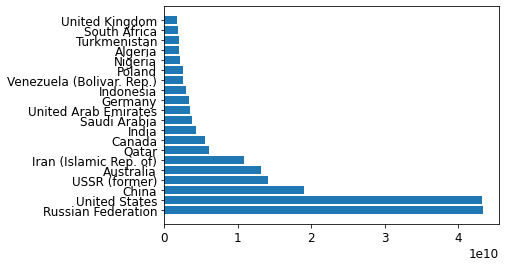

In [27]:
#Visualize the countries with the most quantity of energy consumed
data_area=df.groupby('country_or_area')['quantity'].sum().sort_values(ascending=False)[0:20]
plt.barh(data_area.index,data_area)

<BarContainer object of 10 artists>

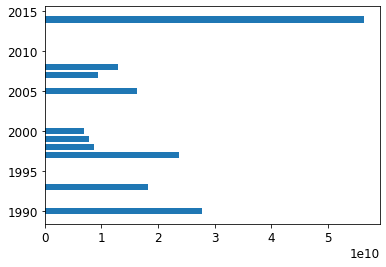

In [30]:
#Visualize the years with the most quantity of energy consumed
data_year=df.groupby('year')['quantity'].sum().sort_values(ascending=False)[0:10]
plt.barh(data_year.index,data_year)

#Most of our data is from the year 2015

In [31]:
df.isnull().sum()

country_or_area                0
commodity_transaction          0
year                           0
unit                           0
quantity                       0
quantity_footnotes       1025536
category                       0
dtype: int64

In [33]:
# Sum of quantity by category
a=df.groupby('category')['quantity'].sum().sort_values(ascending=False)[0:10]
a1=pd.DataFrame(a)
a2 = a1.rename(columns={'quantity': ('quantity'+'20')})
a2

,quantity20
category,
natural_gas_including_lng,8.619686e+10
hard_coal,7.170099e+10
brown_coal,3.882408e+10
conventional_crude_oil,6.929002e+09
peat,3.911019e+09
total_electricity,3.599469e+09
heat,2.870173e+09
other_vegetal_material_and_residues,9.819898e+08
electricity_net_installed_capacity_of_electric_power_plants,4.054776e+08


In [34]:
#10 categories with the most quantity for each year
years=df['year'].unique()
years=np.sort(years)
df_year =pd.DataFrame()
for i in years:
    a=df[df['year']==i]
    a=a.groupby('category')['quantity'].sum().sort_values(ascending=False)[0:10]
    df_year [i]=a
       

In [35]:
df_year

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
category,,,,,,,,,,,,,,,,,,,,,
brown_coal,1.079671e+10,3.450453e+08,NaN,4.160886e+09,5.320160e+07,2.488819e+08,5.578610e+07,8.250783e+09,1.010445e+08,5.789838e+07,...,3.301423e+09,NaN,4.289452e+08,1.215038e+09,NaN,NaN,NaN,NaN,NaN,9.678914e+09
hard_coal,9.757176e+09,1.112334e+09,1.017430e+09,6.121907e+09,1.095447e+09,1.542349e+08,2.945655e+07,7.046132e+09,1.663853e+09,7.081293e+08,...,3.616623e+09,2.655879e+07,4.383452e+08,1.306953e+09,3.013185e+07,3.213059e+07,3.448481e+07,3.588109e+07,3.732655e+07,3.725983e+10
natural_gas_including_lng,5.497432e+09,4.812654e+08,5.754626e+08,6.103396e+09,6.022227e+08,9.230652e+08,6.494389e+08,6.464247e+09,6.390623e+09,6.421103e+09,...,7.681798e+09,8.462649e+08,7.894987e+09,8.136721e+09,8.708319e+08,9.352268e+08,9.605502e+08,9.732870e+08,9.905468e+08,8.441879e+09
peat,1.252933e+09,5.329415e+07,NaN,1.196482e+09,NaN,NaN,NaN,1.309436e+09,1.930924e+07,1.930229e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conventional_crude_oil,1.802984e+08,1.638529e+08,1.600401e+08,1.832326e+08,1.604496e+08,1.606281e+08,1.614799e+08,1.965062e+08,1.679825e+08,1.640090e+08,...,1.095508e+09,1.822203e+08,1.890575e+08,1.661646e+09,1.911419e+08,1.959549e+08,2.076724e+08,2.073089e+08,2.068115e+08,2.430390e+08
total_electricity,9.064159e+07,9.503448e+07,1.030997e+08,1.056272e+08,1.082516e+08,1.117334e+08,1.151769e+08,1.175104e+08,1.204273e+08,1.240287e+08,...,1.553879e+08,1.618484e+08,1.719510e+08,1.748134e+08,1.740146e+08,1.853756e+08,1.908244e+08,1.950066e+08,2.018302e+08,2.054187e+08
heat,8.284264e+07,7.966668e+07,1.319239e+08,1.309032e+08,1.188359e+08,1.114612e+08,1.103355e+08,1.055806e+08,1.051109e+08,1.051030e+08,...,1.177713e+08,1.226922e+08,1.198458e+08,1.181139e+08,1.150084e+08,1.256346e+08,1.291428e+08,1.320977e+08,1.269101e+08,1.252562e+08
falling_water,2.648741e+07,NaN,NaN,3.428092e+07,NaN,3.381198e+07,NaN,3.533987e+07,NaN,NaN,...,4.120220e+07,NaN,NaN,3.982900e+07,NaN,NaN,NaN,NaN,NaN,NaN
other_vegetal_material_and_residues,2.060444e+07,2.081675e+07,2.236273e+07,2.188791e+07,2.326617e+07,2.375350e+07,2.476612e+07,2.557463e+07,2.569491e+07,2.767238e+07,...,4.889684e+07,5.041652e+07,5.162114e+07,5.044624e+07,5.134256e+07,5.361192e+07,5.462555e+07,5.523887e+07,5.685226e+07,5.833942e+07


array([[<AxesSubplot:title={'center':'1990'}>,
        <AxesSubplot:title={'center':'1991'}>,
        <AxesSubplot:title={'center':'1992'}>,
        <AxesSubplot:title={'center':'1993'}>,
        <AxesSubplot:title={'center':'1994'}>],
       [<AxesSubplot:title={'center':'1995'}>,
        <AxesSubplot:title={'center':'1996'}>,
        <AxesSubplot:title={'center':'1997'}>,
        <AxesSubplot:title={'center':'1998'}>,
        <AxesSubplot:title={'center':'1999'}>],
       [<AxesSubplot:title={'center':'2000'}>,
        <AxesSubplot:title={'center':'2001'}>,
        <AxesSubplot:title={'center':'2002'}>,
        <AxesSubplot:title={'center':'2003'}>,
        <AxesSubplot:title={'center':'2004'}>],
       [<AxesSubplot:title={'center':'2005'}>,
        <AxesSubplot:title={'center':'2006'}>,
        <AxesSubplot:title={'center':'2007'}>,
        <AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2009'}>],
       [<AxesSubplot:title={'center':'2010'}>,
        <

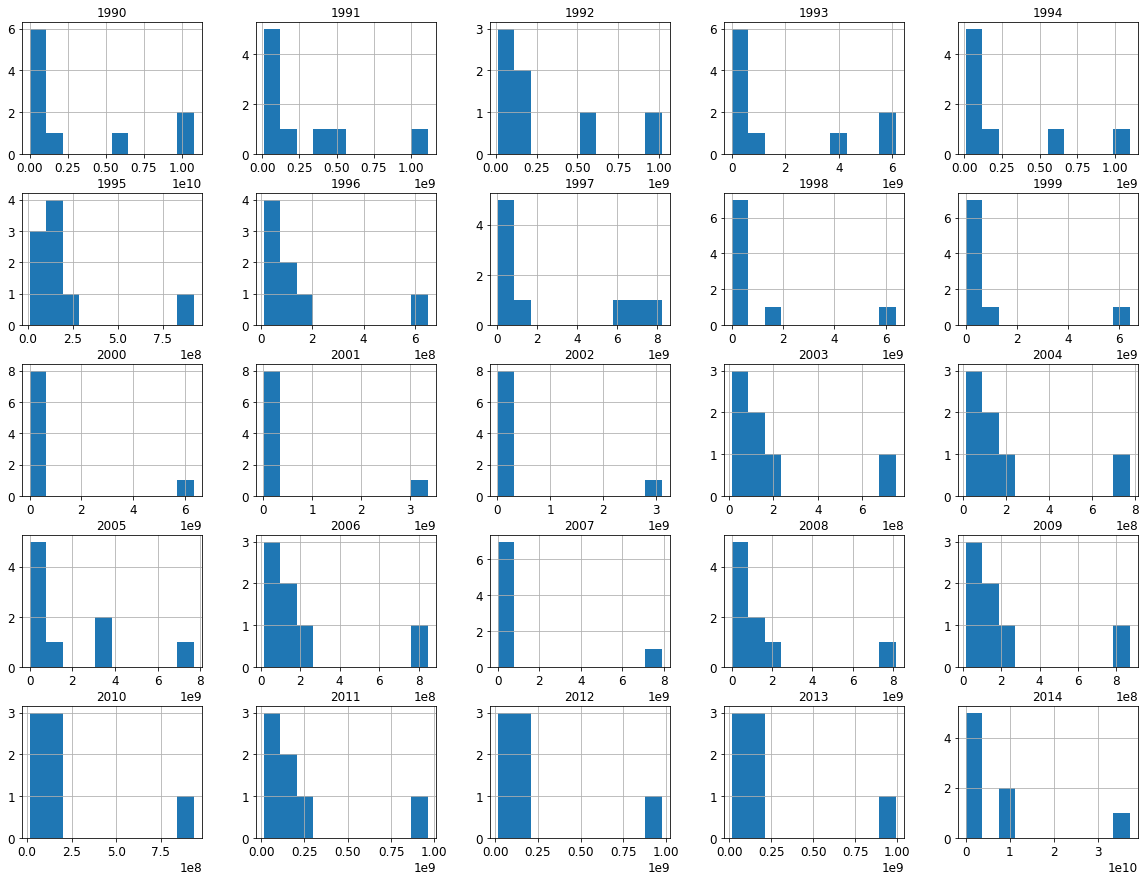

In [36]:
df_year.hist(figsize=(20,15) )

In [37]:
# per each category find the countries with most quantity
cat=df['category'].unique()
df_cat =pd.DataFrame()
for i in cat:
    a=df[df['category']==i]
    a=a.groupby('country_or_area')['quantity'].sum().sort_values(ascending=False)[0:50]
    df_cat [i]=a
       

In [38]:
df_cat.head()

,additives_and_oxygenates,animal_waste,anthracite,aviation_gasoline,bagasse,biodiesel,biogases,biogasoline,bitumen,black_liquor,...,refinery_gas,solar_electricity,sub_bituminous_coal,thermal_electricity,tide_wave_and_ocean_electricity,total_electricity,total_refinery_output,uranium,white_spirit_and_special_boiling_point_industrial_spirits,wind_electricity
country_or_area,,,,,,,,,,,,,,,,,,,,,
United States,519790.0,61872246.0,258393.0,135716.0,1.543172e+06,143583.0,15958214.0,2203217.0,3498346.0,102638818.0,...,3969988.0,81665.0,46768226.0,70645005.0,NaN,866309883.0,39710593.0,722678.0,271256.0,1002367.0
Germany,118292.0,NaN,192770.0,2962.0,NaN,190352.0,10574911.0,54368.0,429441.0,2234238.0,...,491755.0,143706.0,NaN,9291972.0,NaN,125410895.0,5422924.0,9638.0,16334.0,522723.0
Mexico,65544.0,NaN,5049.0,2225.0,1.999429e+05,NaN,77118.0,NaN,190460.0,NaN,...,338785.0,628.0,1183585.0,4320101.0,NaN,46876139.0,3516763.0,2800.0,NaN,18554.0
Italy,53102.0,NaN,NaN,2073.0,NaN,59891.0,2105100.0,4120.0,338738.0,NaN,...,376605.0,76658.0,12910.0,5350926.0,NaN,65152954.0,4597654.0,6100.0,2851.0,90480.0
Canada,46605.0,NaN,58212.0,13032.0,NaN,14486.0,1006039.0,92946.0,490723.0,36004647.0,...,586231.0,4196.0,3513005.0,3662691.0,705.0,121477752.0,4598048.0,1223290.0,13394.0,91573.0


array([[<AxesSubplot:title={'center':'additives_and_oxygenates'}>,
        <AxesSubplot:title={'center':'animal_waste'}>,
        <AxesSubplot:title={'center':'anthracite'}>,
        <AxesSubplot:title={'center':'aviation_gasoline'}>,
        <AxesSubplot:title={'center':'bagasse'}>,
        <AxesSubplot:title={'center':'biodiesel'}>,
        <AxesSubplot:title={'center':'biogases'}>,
        <AxesSubplot:title={'center':'biogasoline'}>],
       [<AxesSubplot:title={'center':'bitumen'}>,
        <AxesSubplot:title={'center':'black_liquor'}>,
        <AxesSubplot:title={'center':'blast_furnace_gas'}>,
        <AxesSubplot:title={'center':'brown_coal_briquettes'}>,
        <AxesSubplot:title={'center':'brown_coal'}>,
        <AxesSubplot:title={'center':'charcoal'}>,
        <AxesSubplot:title={'center':'coal_tar'}>,
        <AxesSubplot:title={'center':'coke_oven_coke'}>],
       [<AxesSubplot:title={'center':'coking_coal'}>,
        <AxesSubplot:title={'center':'conventional_crude_oil'

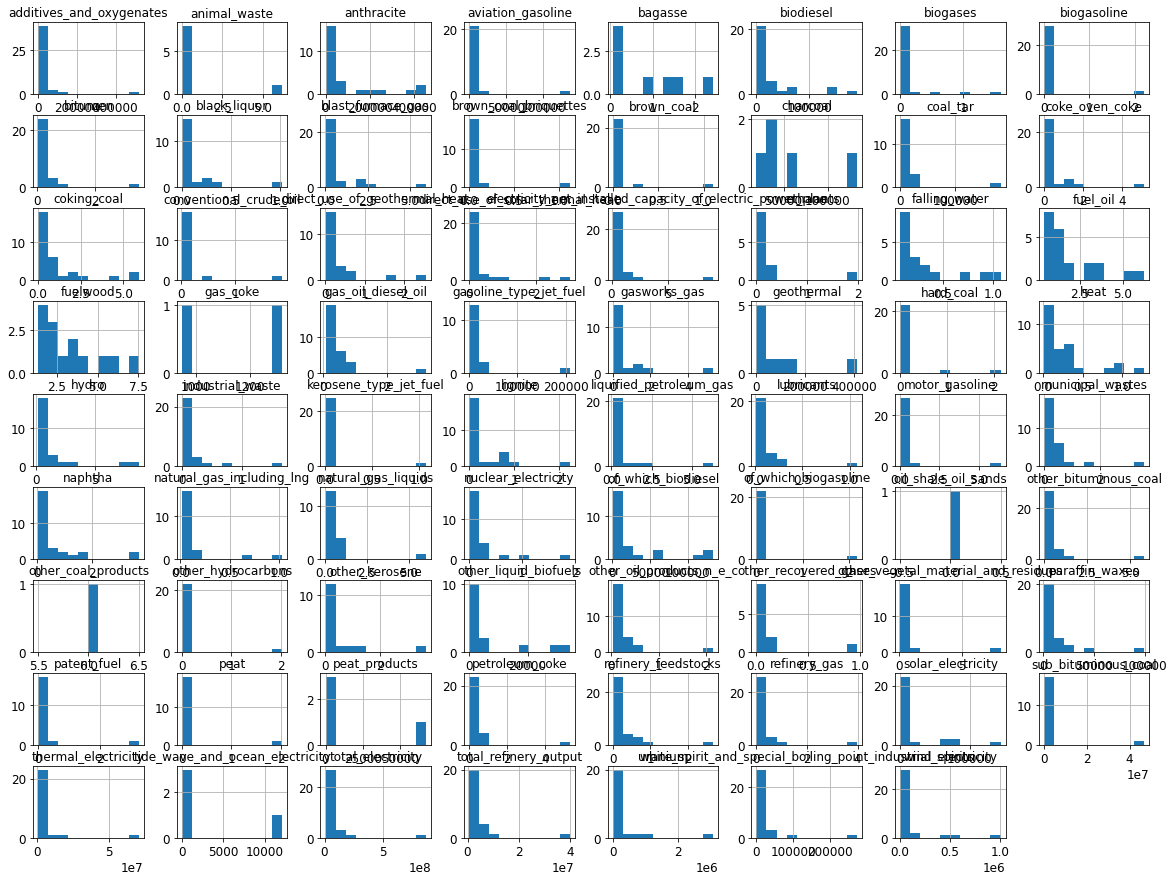

In [39]:
colors = ['red']
df_cat.hist(figsize=(20,15))

In [43]:
area=df['country_or_area'].unique()
df_area =pd.DataFrame()
for i in area:
    a=df[df['country_or_area']==i]
    a=a.groupby('category')['quantity'].sum().sort_values(ascending=False)[0:10]
    df_area [i]=a

In [44]:
df_area.head()

,Austria,Belgium,Czechia,Finland,France,Greece,Hungary,Italy,"Korea, Republic of",Netherlands,...,Isle of Man,Marshall Islands,Montserrat,Nauru,Northern Mariana Islands,Tuvalu,United States Virgin Is.,Wallis and Futuna Is.,Commonwealth of Independent States (CIS),Antarctic Fisheries
category,,,,,,,,,,,,,,,,,,,,,
natural_gas_including_lng,57604553.7,87164440.0,4.781513e+07,20237590.0,258206208.7,12522711.0,8.737337e+07,465973703.0,146130490.7,1.185957e+09,...,146756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_electricity,13532088.0,19000276.0,1.487981e+07,17408126.0,111133815.0,11448371.0,8.337389e+06,65152954.0,73193932.0,2.294918e+07,...,48525.9,16062.1,3604.869,5554.474,70686.0,737.44,193955.916,2149.672,NaN,NaN
heat,12372645.0,5022571.0,2.987713e+07,34645182.0,22623669.0,NaN,1.376106e+07,20096669.0,26811019.0,2.952162e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brown_coal,4233114.0,NaN,9.795748e+07,NaN,NaN,89808147.0,2.096282e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black_liquor,4008068.0,NaN,2.042474e+06,19056300.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'Austria'}>,
        <AxesSubplot:title={'center':'Belgium'}>,
        <AxesSubplot:title={'center':'Czechia'}>,
        <AxesSubplot:title={'center':'Finland'}>,
        <AxesSubplot:title={'center':'France'}>,
        <AxesSubplot:title={'center':'Greece'}>,
        <AxesSubplot:title={'center':'Hungary'}>,
        <AxesSubplot:title={'center':'Italy'}>,
        <AxesSubplot:title={'center':'Korea, Republic of'}>,
        <AxesSubplot:title={'center':'Netherlands'}>,
        <AxesSubplot:title={'center':'Romania'}>,
        <AxesSubplot:title={'center':'Serbia'}>,
        <AxesSubplot:title={'center':'Slovakia'}>,
        <AxesSubplot:title={'center':'Ukraine'}>,
        <AxesSubplot:title={'center':'United Kingdom'}>,
        <AxesSubplot:title={'center':'United States'}>],
       [<AxesSubplot:title={'center':'Brunei Darussalam'}>,
        <AxesSubplot:title={'center':'Bulgaria'}>,
        <AxesSubplot:title={'center':'Canada'}>,
        <AxesSu

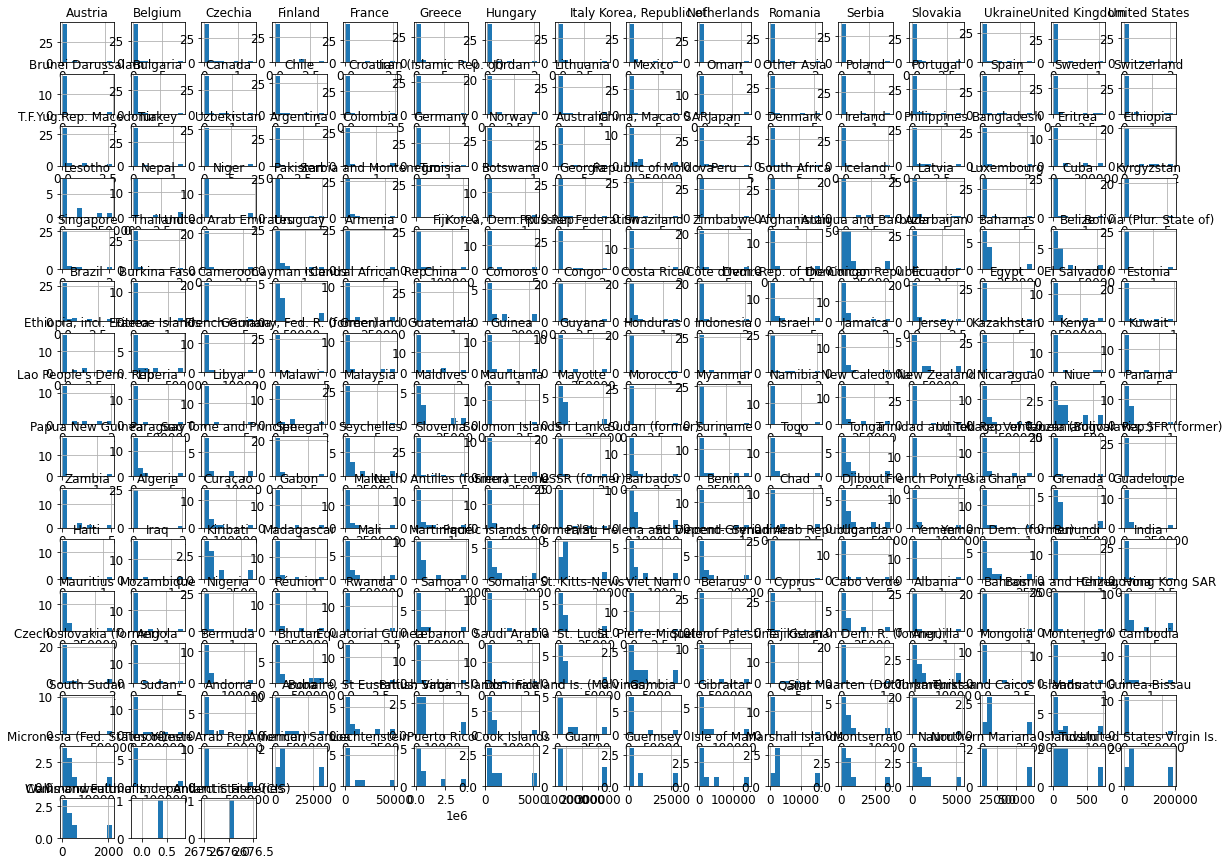

In [42]:
df_area.hist(figsize=(20,15))

In [45]:
#Find the quantity of energy consumed by year, country and category:
k=df.groupby(['category','year','country_or_area'])['quantity'].sum().reset_index()
#k.groupby('year').sum().sort_values(ascending=False)[0:10]
k=pd.DataFrame(k)
k

,category,year,country_or_area,quantity
0,additives_and_oxygenates,1990,Austria,358.0
1,additives_and_oxygenates,1990,Greece,164.0
2,additives_and_oxygenates,1990,Italy,220.0
3,additives_and_oxygenates,1990,Japan,512.0
4,additives_and_oxygenates,1990,Mexico,910.0
...,...,...,...,...
121875,wind_electricity,2014,United Kingdom,32015.0
121876,wind_electricity,2014,United States,183892.0
121877,wind_electricity,2014,Uruguay,732.6
121878,wind_electricity,2014,Vanuatu,3.0


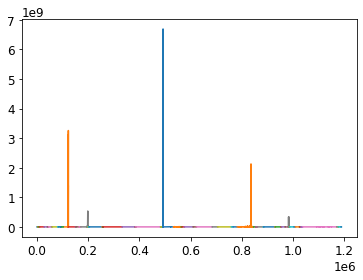

In [46]:
#Overlapping plot
k=df.groupby('category')['quantity']
#fig, ax = plt.subplots()
for key, grp in k:
    ncols=3
    nrows = int(np.ceil(k.ngroups/ncols))
    a=pd.DataFrame(grp)
    #print(key,a.shape)
    plt.plot(a.index , a['quantity'], label=key)
    

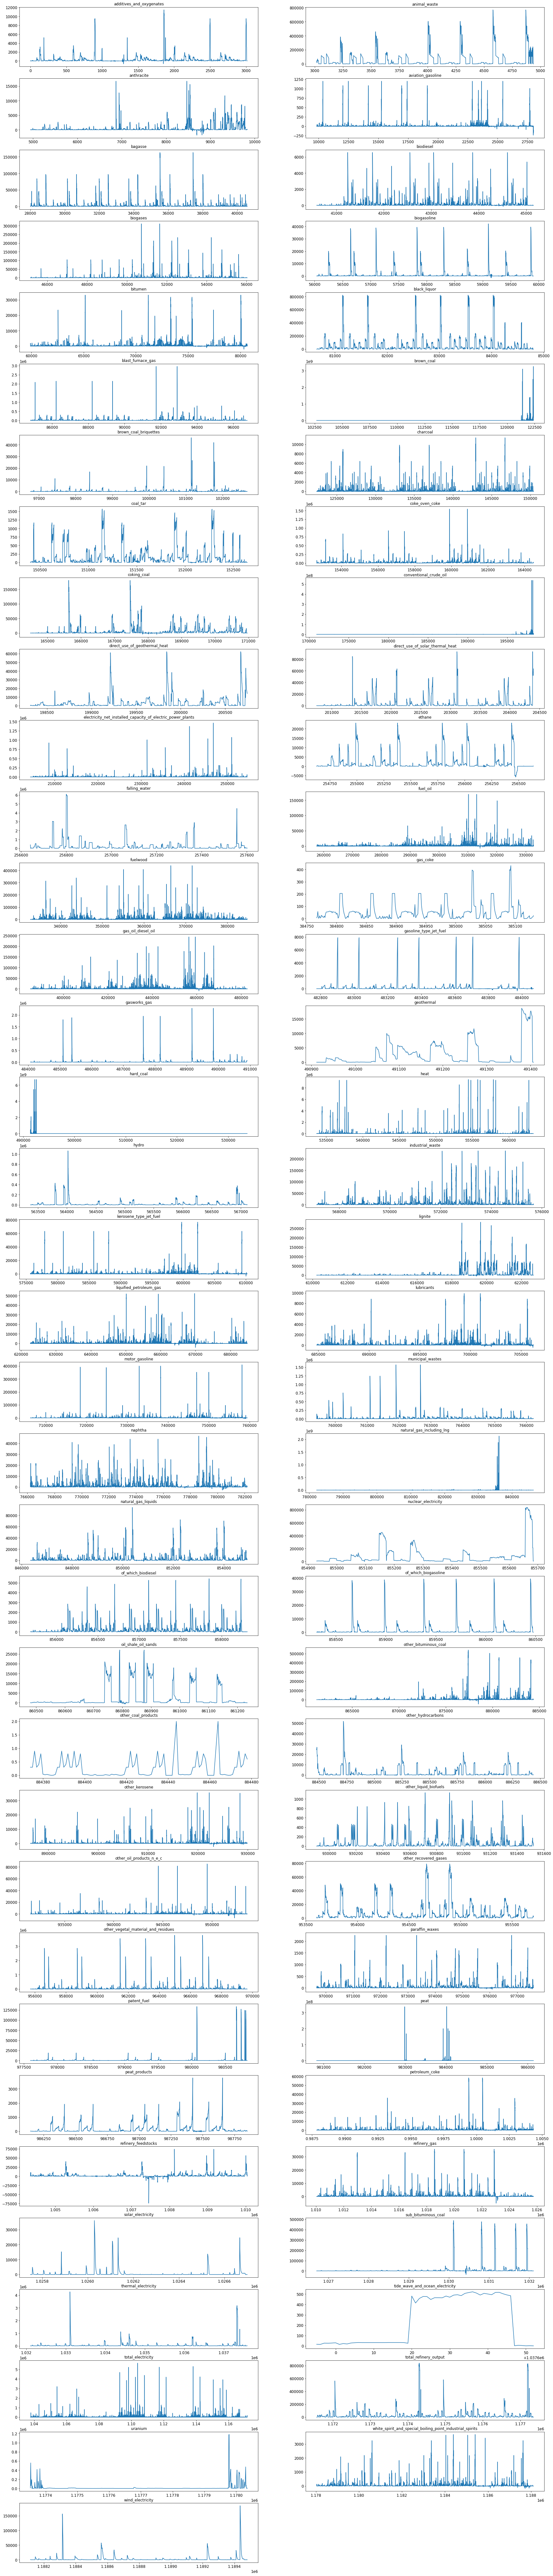

In [47]:
k=df.groupby('category')['quantity']
fig = plt.figure(figsize=(30,150))
i=0
for key, grp in k:
    ncols=2
    nrows = int(np.ceil(k.ngroups/ncols))
    ax = fig.add_subplot(nrows, ncols, 1 + i)
    ax.plot( grp.index , grp)
    ax.set_title(key)
    i+=1
ax.legend()
plt.show()